# Predicting kvaliteten på viner.
notebook för träning av DecisionTreeClassifier modell för att predictera kvaliteten på viner.

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree



In [7]:
data_df = pd.read_csv("/Users/ahmadzarzar/Downloads/WineQT.csv")

In [8]:
data_df.head(1143)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

### Data analys 

dataset innehåller 1143 datapunkter och 13 attributer

In [9]:
data_df.shape

(1143, 13)

Hur många datapunkter och attribut finns?

Det finns 1143 datapunkter och 13 attributer.

In [10]:
data_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Hur många klasser av kvalitet finns det?

Det finns 6 klasser av kvalitet som den tabelen visar ovan på.

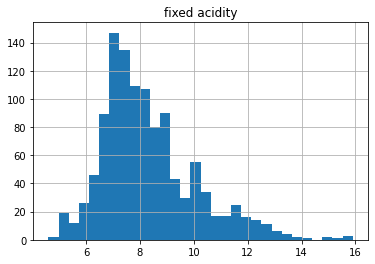

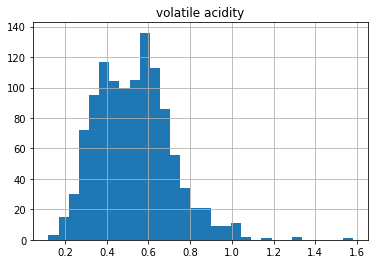

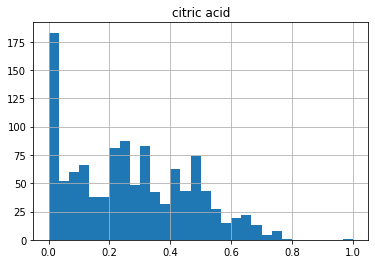

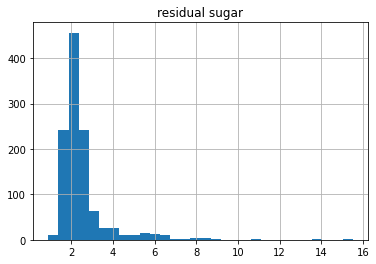

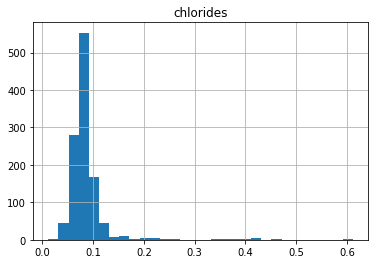

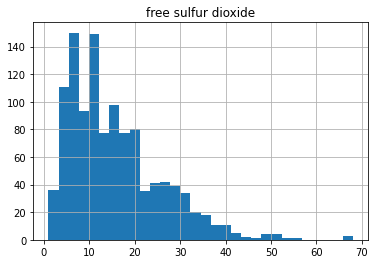

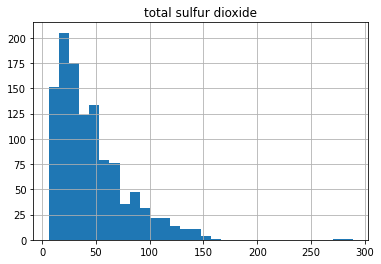

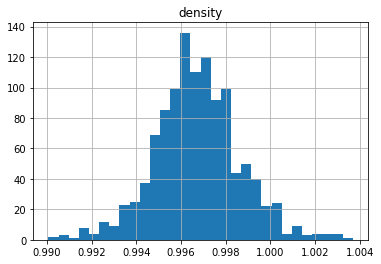

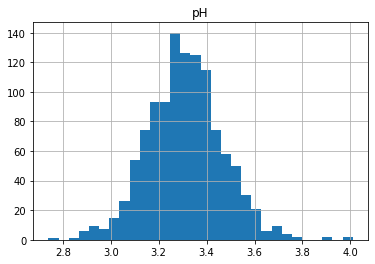

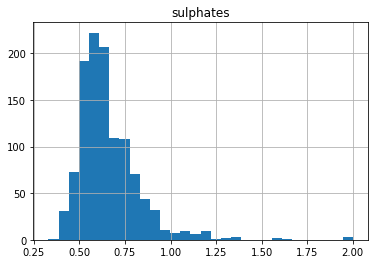

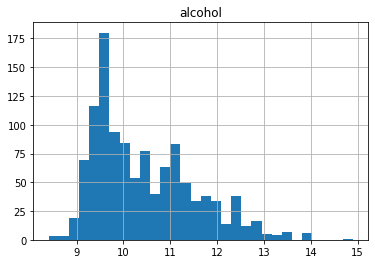

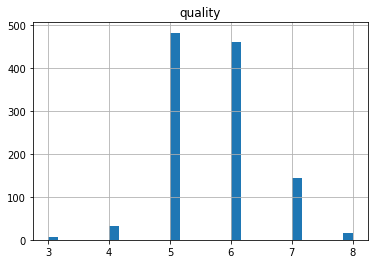

In [11]:
fethchar_list=[['fixed acidity'],['volatile acidity'],['citric acid'],['residual sugar'],['chlorides'],
['free sulfur dioxide'],['total sulfur dioxide'],['density'],['pH']
,['sulphates'],['alcohol'],['quality']]

for x in fethchar_list:
    data_df[x].hist(bins=30)

Finns det något attribut som inte borde användas?

Ja ID attributen bör tas bort för ID id är ett attribut som inte har någon påverkan på datan som vi använder så om vi plockar bort det den kommer inte att göra vår data sämre.

### Skapa träning/test data 
Target:quality

In [12]:
x,y=data_df.drop(columns=['quality','Id'],) , data_df.quality 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

### Träning DecisionTreeClassifier modell 

In [13]:
decision_tree= DecisionTreeClassifier(min_samples_leaf=1,random_state=42)

decision_tree.fit(x_train,y_train)

test=decision_tree.score(x_test,y_test)
tr=decision_tree.score(x_train,y_train)

print(test)
print(tr)




0.5895196506550219
1.0


### Kolla djupet på trädet och hur många löv det innehåller samt vilka attribut som har mest påverkan

Hur djupt är trädet?

In [14]:
print(f'Det är {decision_tree.get_depth()} noder djupt.')

Det är 19 noder djupt.


Hur många löv har trädet?

In [15]:
print(f'Det är {decision_tree.get_n_leaves()} löv')

Det är 234 löv


Vilka attribut har störst påverkan?

<AxesSubplot:>

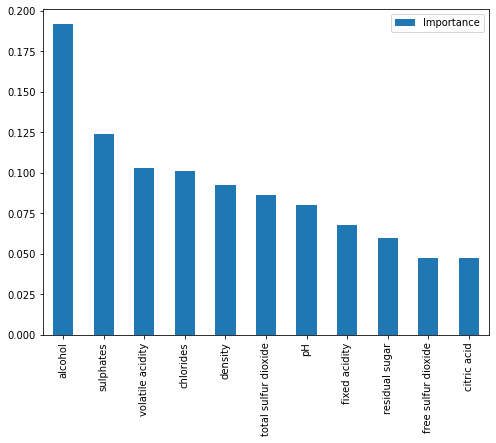

In [16]:
feat_importances = pd.DataFrame(decision_tree.feature_importances_, index=x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))


In [17]:
print(feat_importances)

                      Importance
alcohol                 0.191576
sulphates               0.124119
volatile acidity        0.103043
chlorides               0.100836
density                 0.092296
total sulfur dioxide    0.086357
pH                      0.080086
fixed acidity           0.067551
residual sugar          0.059475
free sulfur dioxide     0.047406
citric acid             0.047255


### Jämföralse träningsscore och testscore

In [18]:
# HÄR BÖRJAR VG
traning=decision_tree.score(x_train,y_train)
print(traning)
print(test)


1.0
0.5895196506550219


 Hur skiljer de sig och varför?
 
 Det ser man på värde när vi skriver ut resultatet på träningen och test score och där ser man att träningen ligger på 1.0 samt test score ligger på 0.59 så resultatet visar hur de skiljer sig på score.

 Varför? för att DecisionTreeClassifier modulen ger overfitting  på datan som vi tränad som gör att de skjlier sig på datatränig så därför kan det blir 1.0 

Finns det något att göra åt fenomenet?

Ja, det finns något man kan göra om man vill ändra på värdet i test och träning score genom att ändra på värdet i parametern som finns i modulen DecisionTreeClassifier som heter min_samples_leaf så man kan få olika resultat varja gång man ändra på siffran men oftast är bäst att välja att den är = 1

### Ritar ut trädet

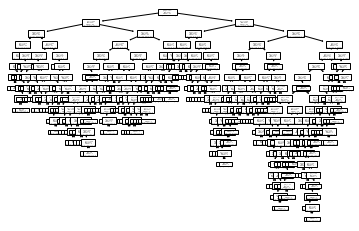

In [19]:
tree.plot_tree(decision_tree)
plt.show()


In [20]:
fig=plt.figure(figsize=(239,100))
pl=tree.plot_tree(decision_tree,fontsize=60,
filled=True)

Hur många grenar kommer det maximalt från en nod?

det maximalt 2 grenar från en nod.

Varför är det max så många grenar från en nod?

Anledning att det är max två grenar per nod kan vara att det är enklare att göra ja eller nej fråga för att komma till beslutet  och för att modulen i sklearn använder sig av två grenar dvs att de har byggd den så.